# Clustering

## KMeans

#### Taken from [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)

In [147]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

### Preparing the data

In [148]:
digits = load_digits()
X = digits.data
y = digits.target

In [149]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [150]:
X.shape

(1797, 64)

In [151]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# digits is handwritten digits from 0-9
# Note: scikit-learn uses Euclidean distance
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=10))
clf = pipeline.fit(X)

In [152]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

In [153]:
clustering_metric_algos = [homogeneity_score, completeness_score, v_measure_score, adjusted_mutual_info_score, adjusted_rand_score]

clustering_metrics =  [clf[-1].inertia_] + [algo(y, clf[-1].labels_) for algo in clustering_metric_algos]
clustering_metrics.append(silhouette_score(X, clf[-1].labels_, metric='euclidean', sample_size=300))

In [154]:
print("inertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*clustering_metrics))

inertia	homo	compl	v-meas	ARI	AMI	silhouette
69658	0.676	0.715	0.695	0.692	0.567	0.175


## Note PCA yields better results

In [155]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10).fit(X)
pca_pipeline = make_pipeline(StandardScaler(), KMeans(init=pca.components_, n_clusters=10))
pca_clf = pca_pipeline.fit(X)

c:\Users\mjt5v\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1307: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


In [156]:
pca_clustering_metrics =  [pca_clf[-1].inertia_] + [algo(y, pca_clf[-1].labels_) for algo in clustering_metric_algos]
pca_clustering_metrics.append(silhouette_score(X, pca_clf[-1].labels_, metric='euclidean', sample_size=300))

In [157]:
print("inertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*pca_clustering_metrics))

inertia	homo	compl	v-meas	ARI	AMI	silhouette
72713	0.637	0.659	0.648	0.644	0.521	0.142


([], [])

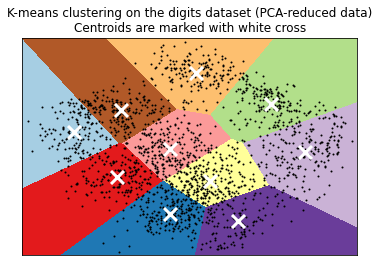

In [158]:
# plot results

mesh_step_size = 0.02

# reduce 32x32 space to 2 dims so we can visaulize

reduced_X = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_X)

x_min, x_max = reduced_X[:, 0].min() - 1, reduced_X[:, 0].max() + 1
y_min, y_max = reduced_X[:, 1].min() - 1, reduced_X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X[:, 0], reduced_X[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## KMediods

In [159]:
# install with pip install scikit-learn-extras

from sklearn_extra.cluster import KMedoids

In [160]:
kmediods_pipeline = make_pipeline(StandardScaler(), KMedoids(n_clusters=10))
kmediods_clf = kmediods_pipeline.fit(X)
kmediods_clustering_metrics =  [kmediods_clf[-1].inertia_] + [algo(y, kmediods_clf[-1].labels_) for algo in clustering_metric_algos]
kmediods_clustering_metrics.append(silhouette_score(X, kmediods_clf[-1].labels_, metric='euclidean', sample_size=300))

print("inertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*kmediods_clustering_metrics))

inertia	homo	compl	v-meas	ARI	AMI	silhouette
11779	0.555	0.564	0.559	0.555	0.452	0.124


([], [])

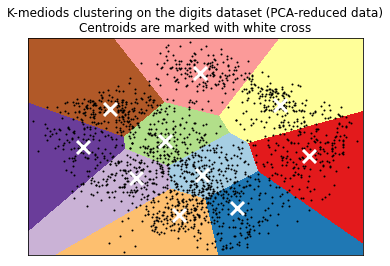

In [161]:
# plot results

mesh_step_size = 0.02

# reduce 32x32 space to 2 dims so we can visaulize

reduced_X = PCA(n_components=2).fit_transform(X)
kmediods = KMedoids(n_clusters=10)
kmediods.fit(reduced_X)

x_min, x_max = reduced_X[:, 0].min() - 1, reduced_X[:, 0].max() + 1
y_min, y_max = reduced_X[:, 1].min() - 1, reduced_X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))

Z = kmediods.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X[:, 0], reduced_X[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmediods.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-mediods clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

## Find the best k

In [162]:
sse = {}
silhouettes = {}

for k in range(2, 14):
    k_means_pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=k, max_iter=1000, random_state=42))
    k_means_pipeline.fit(X)
    sse[k] = k_means_pipeline[-1].inertia_
    labels = k_means_pipeline[-1].labels_
    scaled_X = k_means_pipeline[0].transform(X)
    silhouettes[k] = silhouette_score(scaled_X, labels)

k_values = list(sse.keys())
sse_values = list(sse.values())
silhouette_values = list(silhouettes.values())

### SSEs

<AxesSubplot:>

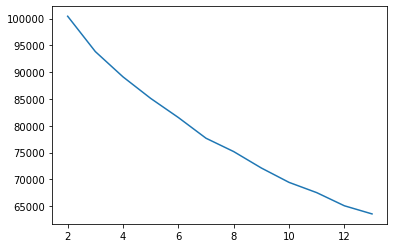

In [163]:
sns.lineplot(x=k_values, y=sse_values)

### Silhouettes

<AxesSubplot:>

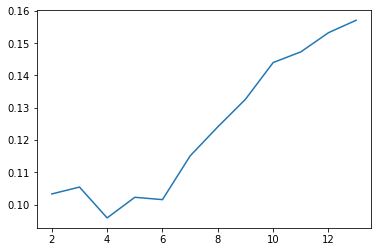

In [164]:
sns.lineplot(x=k_values, y=silhouette_values)

### Programmatically

In [165]:
from scipy.interpolate import UnivariateSpline

def second_derivative(x, y):
    y_spl = UnivariateSpline(x, y, s=0, k=3)
    return x, y_spl.derivative(n=2)(x)

array([ 4,  9, 12], dtype=int64)

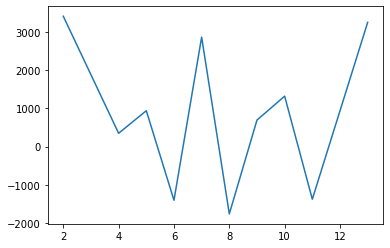

In [166]:
x, ddy = second_derivative(k_values, sse_values)
sns.lineplot(x=x, y=ddy)
np.abs(ddy).argsort()[:3] + 2

array([ 8, 12,  9], dtype=int64)

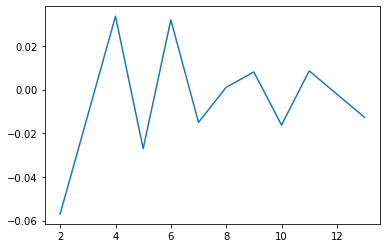

In [167]:
x, ddy = second_derivative(k_values, silhouette_values)
sns.lineplot(x=x, y=ddy)
np.abs(ddy).argsort()[:3] + 2

# KNN

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)
pipeline = make_pipeline(PCA(n_components=10), StandardScaler(), KNeighborsClassifier(n_neighbors=10))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  1, 51,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  1,  0],
       [ 0,  2,  0,  3,  0,  1,  1,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 31]], dtype=int64)

## DBScan

In [169]:
from sklearn.cluster import DBSCAN

In [170]:
dbscan_pipeline = make_pipeline(StandardScaler(), DBSCAN(eps=4.61, min_samples=5))
dbscan_clf = dbscan_pipeline.fit(X)
dbscan_clustering_metrics = [len(np.unique(dbscan_clf[-1].labels_))] + [algo(y, dbscan_clf[-1].labels_) for algo in clustering_metric_algos]
dbscan_clustering_metrics.append(silhouette_score(X, dbscan_clf[-1].labels_, metric='euclidean', sample_size=300))

print("labels\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*dbscan_clustering_metrics))


labels	homo	compl	v-meas	ARI	AMI	silhouette
10	0.382	0.616	0.471	0.464	0.180	0.004


# Hierarchical Clustering

## Single link

In [171]:
from sklearn.cluster import AgglomerativeClustering
single_link_pipeline = make_pipeline(StandardScaler(), AgglomerativeClustering(distance_threshold=13.7, linkage='single', n_clusters=None))
single_link_clf = single_link_pipeline.fit(X)
single_link_clustering_metrics = [len(np.unique(single_link_clf[-1].labels_))] + [algo(y, single_link_clf[-1].labels_) for algo in clustering_metric_algos]
single_link_clustering_metrics.append(silhouette_score(X, single_link_clf[-1].labels_, metric='euclidean', sample_size=300))

print("labels\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*single_link_clustering_metrics))

labels	homo	compl	v-meas	ARI	AMI	silhouette
10	0.006	0.276	0.011	0.001	0.000	-0.111


In [172]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

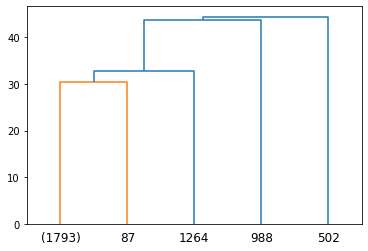

In [173]:
plot_dendrogram(single_link_clf[-1], truncate_mode='level', p=3)

## Furthest link

In [174]:
furthest_link_pipeline = make_pipeline(StandardScaler(), AgglomerativeClustering(distance_threshold=30, linkage='complete', n_clusters=None))
furthest_link_clf = furthest_link_pipeline.fit(X)
furthest_link_clustering_metrics = [len(np.unique(furthest_link_clf[-1].labels_))] + [algo(y, furthest_link_clf[-1].labels_) for algo in clustering_metric_algos]
furthest_link_clustering_metrics.append(silhouette_score(X, furthest_link_clf[-1].labels_, metric='euclidean', sample_size=300))

print("labels\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*furthest_link_clustering_metrics))

labels	homo	compl	v-meas	ARI	AMI	silhouette
10	0.017	0.249	0.032	0.017	0.000	-0.010


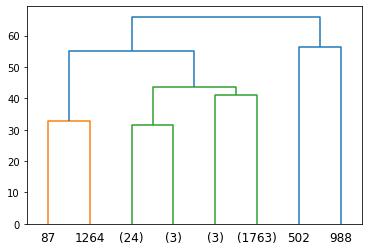

In [175]:
plot_dendrogram(furthest_link_clf[-1], truncate_mode='level', p=3)

## Average Link

In [176]:
avg_link_pipeline = make_pipeline(StandardScaler(), AgglomerativeClustering(distance_threshold=21, linkage='average', n_clusters=None))
avg_link_clf = avg_link_pipeline.fit(X)
avg_link_clustering_metrics = [len(np.unique(avg_link_clf[-1].labels_))] + [algo(y, avg_link_clf[-1].labels_) for algo in clustering_metric_algos]
avg_link_clustering_metrics.append(silhouette_score(X, avg_link_clf[-1].labels_, metric='euclidean', sample_size=300))

print("labels\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*avg_link_clustering_metrics))

labels	homo	compl	v-meas	ARI	AMI	silhouette
10	0.007	0.238	0.014	0.001	0.000	-0.019


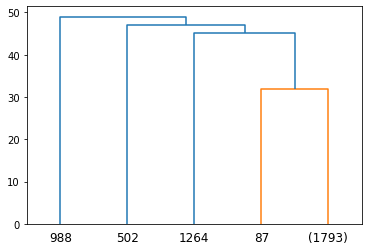

In [177]:
plot_dendrogram(avg_link_clf[-1], truncate_mode='level', p=3)

## Ward

In [178]:
ward_link_pipeline = make_pipeline(StandardScaler(), AgglomerativeClustering(distance_threshold=70, linkage='ward', n_clusters=None))
ward_link_clf = ward_link_pipeline.fit(X)
ward_link_clustering_metrics = [len(np.unique(ward_link_clf[-1].labels_))] + [algo(y, ward_link_clf[-1].labels_) for algo in clustering_metric_algos]
ward_link_clustering_metrics.append(silhouette_score(X, ward_link_clf[-1].labels_, metric='euclidean', sample_size=300))

print("labels\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}".format(*ward_link_clustering_metrics))

labels	homo	compl	v-meas	ARI	AMI	silhouette
10	0.758	0.836	0.796	0.793	0.664	0.150


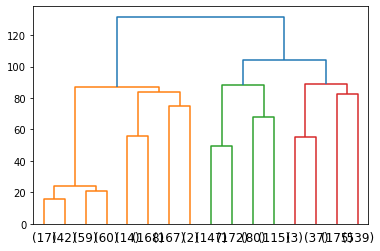

In [179]:
plot_dendrogram(ward_link_clf[-1], truncate_mode='level', p=3)